This is pulling cyrptocurrencies prices from a public API and downloading them as excel files. To do this, we need to import requests to pull data and pandas to process it.

To use basic math and to be able to use charts, we will import matplot and numpy

In [18]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

numpy is the most popular Python library for array manipulation and numeric computing
matplotlib is the most popular visualization library in the Python ecosystem

Now we can enter some plots

In [19]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

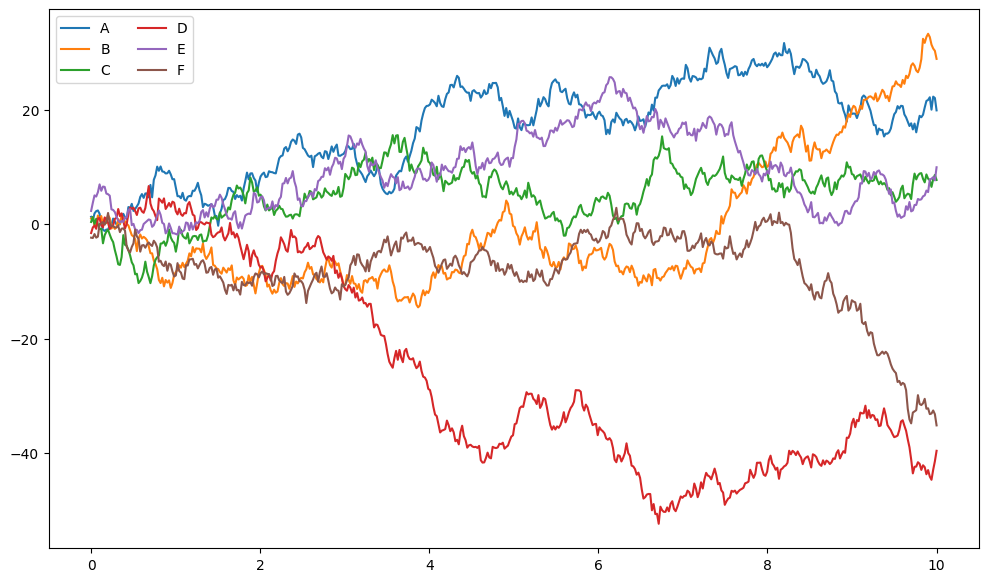

In [20]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

We are pulling from crypto watch, they provide free keys and access to use their API's. If you make an account, you have access to use their API's. In terrms of free API's, this is one of the best when it comes to Crypto/Finance. 

In [21]:
import requests
import pandas as pd

In [22]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [23]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-02-12 12:23:06.173183')

In [24]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [25]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [26]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-12 13:00:00,21889,21895,21824,21830,52.826108,1.154698e+06
2023-02-12 14:00:00,21830,21834,21774,21816,64.415702,1.404450e+06
2023-02-12 15:00:00,21816,21987,21816,21926,71.701415,1.570671e+06
2023-02-12 16:00:00,21928,21970,21893,21948,25.024842,5.486663e+05
2023-02-12 17:00:00,21947,22086,21934,22013,91.399094,2.012396e+06


<Axes: xlabel='CloseTime'>

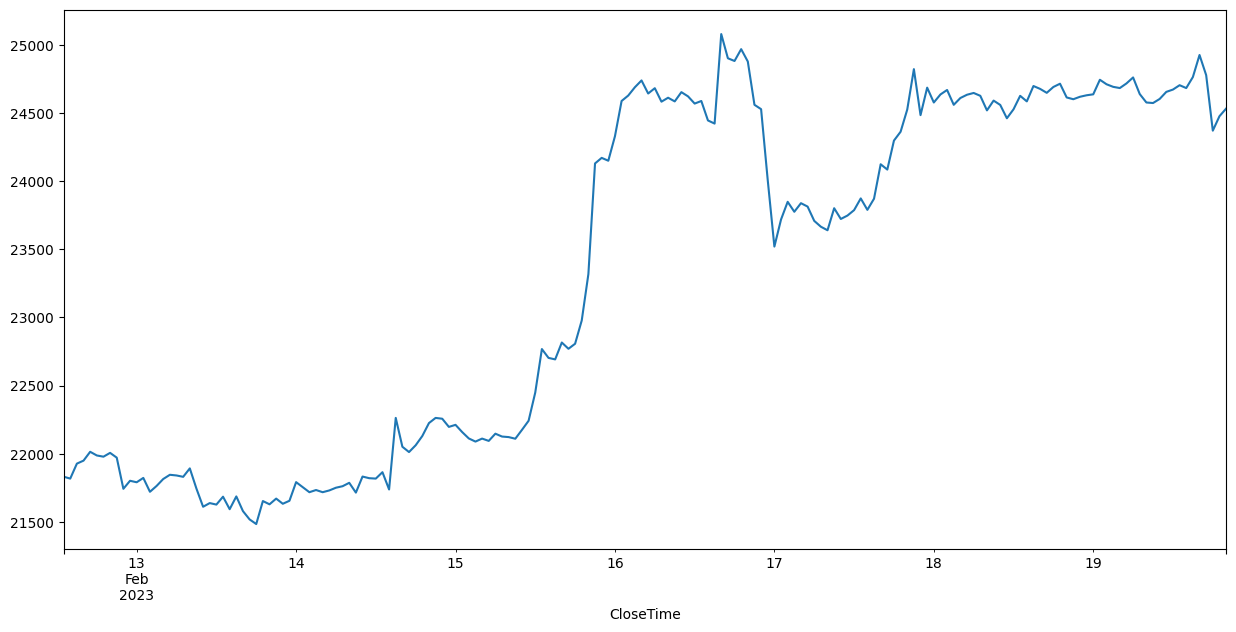

In [27]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [28]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-12 13:00:00,1533.8,1535.6,1522.5,1526.0,138.545218,211546.343146
2023-02-12 14:00:00,1525.5,1528.9,1522.5,1525.3,76.547955,116789.428723
2023-02-12 15:00:00,1526.6,1538.1,1525.2,1533.0,143.163531,219074.934824
2023-02-12 16:00:00,1533.1,1541.0,1530.6,1536.4,78.741635,120928.566230
2023-02-12 17:00:00,1536.4,1548.0,1535.0,1544.1,341.694466,527411.791968


<Axes: xlabel='CloseTime'>

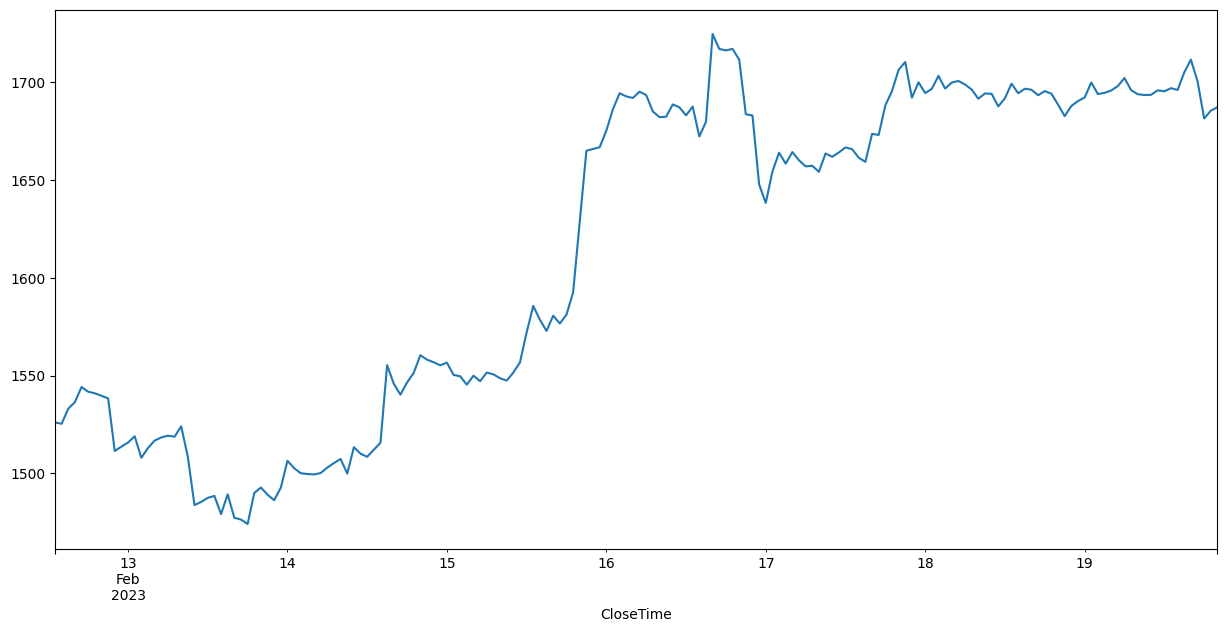

In [29]:
eth['ClosePrice'].plot(figsize=(15, 7))